<a href="https://colab.research.google.com/github/k87rte/MNIST_DL/blob/main/MNIST_DL_play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Use tensorflow to make DL-models for predicting handwritten numbers from the MNIST dataset

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import mnist
from keras import Sequential, layers
from keras.layers import Flatten, Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

the shape of MNIST X = (70000, 28, 28)
the shape of MNIST y = (70000,)
****************************


Text(0.5, 0.98, 'handwritten numbers')

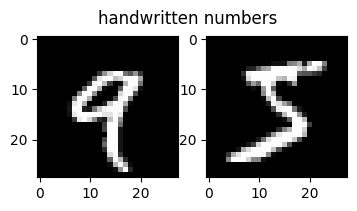

In [2]:
(trainX, trainy),(testX, testy) = mnist.load_data()
X = np.concatenate((trainX, testX),axis = 0)
y = np.concatenate((trainy, testy), axis = 0)
print(f'the shape of MNIST X = {X.shape}')
print(f'the shape of MNIST y = {y.shape}')
print('****************************')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(4,2))
ax1.imshow(X[4,:,:], cmap='gray')
ax2.imshow(X[0,:,:], cmap='gray')
fig.suptitle('handwritten numbers')

In [3]:
rS = 42
trainX, testX, trainy, testy = train_test_split(X,y,
                                                random_state=rS,
                                                shuffle=True,
                                                train_size=.8)
print(f'shape of trainX is {trainX.shape} for random state {rS}')
print(f'shape of testX is {testX.shape} for random state {rS}')


# the pixel intensities are 0-255. bringing it
# between 0-1 will help in reaching the best params faster.

trainX_norm = trainX/255
testX_norm = testX/255
trainy_onehot = to_categorical(trainy)
testy_onehot = to_categorical(testy)

# search and remove images with NAN
print(f'does train images have nan: {np.isnan(trainX_norm).any()}')
print(f'does test images have nan: {np.isnan(testX_norm).any()}')
print(f'does train labels have nan: {np.isnan(trainy).any()}')
print(f'does test labels have nan: {np.isnan(testy).any()}')

shape of trainX is (56000, 28, 28) for random state 42
shape of testX is (14000, 28, 28) for random state 42
does train images have nan: False
does test images have nan: False
does train labels have nan: False
does test labels have nan: False


In [16]:
from keras.engine import input_spec
# build a fully connected dense neural network
model_fc = Sequential()
model_fc.add(Flatten(name='flatten_in'))
model_fc.add(Dense(64, activation='relu', name='layer1'))
model_fc.add(Dense(32, activation='relu', name='layer2'))
model_fc.add(Dense(16, activation='relu', name='layer3'))
model_fc.add(Dense(10, activation='softmax', name='finalLayer'))

model_fc.compile(
                 optimizer=keras.optimizers.Adam(learning_rate=0.001),
                 loss=keras.losses.CategoricalCrossentropy(),
                 metrics=[keras.metrics.CategoricalAccuracy()],
                 )
model_fc.build((None, 28*28))
model_fc.summary()

history = model_fc.fit(trainX_norm,
             trainy_onehot,
             epochs=30,
             batch_size=32,
             validation_data=(testX_norm, testy_onehot))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_in (Flatten)        (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 64)                50240     
                                                                 
 layer2 (Dense)              (None, 32)                2080      
                                                                 
 layer3 (Dense)              (None, 16)                528       
                                                                 
 finalLayer (Dense)          (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1750/1750 [============================

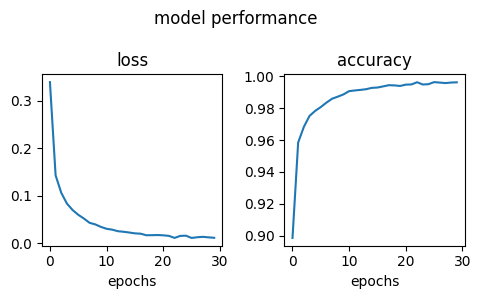

In [17]:
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(5,3))
ax1.plot(loss)
ax2.plot(accuracy)
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
fig.suptitle('model performance')
plt.tight_layout()
